In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 초록색 영역을 추출하는 함수
def find_green_corners(image):
    # 이미지를 HSV 색상 공간으로 변환
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # 초록색 범위 정의 (HSV)
    lower_green = np.array([20, 20, 20])  # 초록색의 하한값
    upper_green = np.array([80, 255, 255])  # 초록색의 상한값

    # 초록색 영역만을 추출
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # 마스크 이미지로부터 초록색 영역을 추출
    result = cv2.bitwise_and(image, image, mask=mask)

    # 초록색 영역의 윤곽선 검출
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 가장 큰 윤곽선 찾기 (초록색 영역이 여러 개인 경우 가장 큰 영역을 선택)
    if len(contours) > 0:
        largest_contour = max(contours, key=cv2.contourArea)

        # 다각형 근사화를 사용해 꼭짓점 찾기
        epsilon = 0.02 * cv2.arcLength(largest_contour, True)
        approx = cv2.approxPolyDP(largest_contour, epsilon, True)

        # 꼭짓점 좌표 추출
        corners = [tuple(point[0]) for point in approx]

        # 이미지에 꼭짓점 표시 및 좌표 출력
        for corner in corners:
            cv2.circle(image, corner, 5, (0, 0, 255), -1)  # 빨간색 점으로 표시
            cv2.putText(image, f"{corner}", (corner[0] + 5, corner[1] - 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 5, cv2.LINE_AA)

        return corners, image

    return [], image

In [4]:
cap = cv2.VideoCapture(0)
ret, image = cap.read()

2024-10-25 11:13:55.895 python[56143:205380] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


Corners of the green area: [(0, 103), (1403, 1003), (1471, 98), (1919, 1079), (1919, 1)]


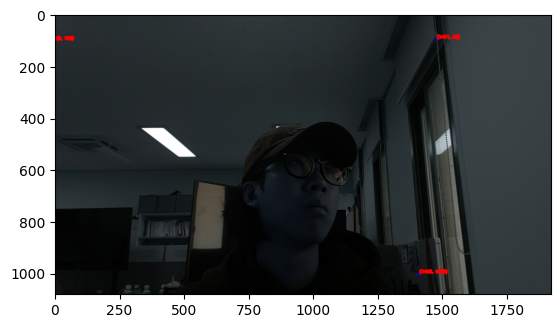

In [5]:
# 예제 이미지 불러오기 (카메라 사용 시 아래 부분을 대체)
# image = cv2.imread('edge3.jpg')
# image = cv2.resize(image, (1080, 720))

# 초록색 영역의 꼭짓점 찾기
corners, result_image = find_green_corners(image)

# 결과 출력
print("Corners of the green area:", corners)
plt.imshow(result_image)